# Importing and Installing Important Libraries

In [1751]:
#install required libraries
!pip install xgboost
!pip install mlxtend

In [1915]:
#import required libraries
from time import time
import numpy as np                                                              #Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                             
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.metrics import mean_absolute_error
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [1839]:
#importing data 
data = pd.read_csv("C:\\Users\\talib\\Artificial Intelligence\\Coursework\\CE802_P2_Data\\CE802_P2_Data.csv")
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,NaN,False
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,7.22,False
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,7.69,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,NaN,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,30,266.88,-18.69,-17.30,14.70,383.22,-4.94,-3.05,-9.78,5.95,-14.20,20.89,-9.29,110,9.38,True
1496,30,206.88,-22.35,-18.00,12.30,428.22,-3.27,-3.48,-8.46,9.20,-11.56,30.89,-8.44,260,6.52,False
1497,30,106.88,-17.91,-17.48,13.50,623.22,-5.96,-2.59,-13.89,9.40,-7.06,20.89,-11.79,370,NaN,True
1498,30,336.88,-23.73,-18.68,17.60,503.22,-5.01,-3.72,-7.98,6.50,-8.60,30.89,-8.04,250,NaN,False


In [1754]:
#checking the datatype and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   int64  
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   int64  
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB


In [1756]:

data['Class'] = data['Class'].map({True:1, False:0})  # Replace boolean by string
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,NaN,0
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,7.22,0
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,7.69,0
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,NaN,0
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,30,266.88,-18.69,-17.30,14.70,383.22,-4.94,-3.05,-9.78,5.95,-14.20,20.89,-9.29,110,9.38,1
1496,30,206.88,-22.35,-18.00,12.30,428.22,-3.27,-3.48,-8.46,9.20,-11.56,30.89,-8.44,260,6.52,0
1497,30,106.88,-17.91,-17.48,13.50,623.22,-5.96,-2.59,-13.89,9.40,-7.06,20.89,-11.79,370,NaN,1
1498,30,336.88,-23.73,-18.68,17.60,503.22,-5.01,-3.72,-7.98,6.50,-8.60,30.89,-8.04,250,NaN,0


# Visualisation
Checking the correlation between the variables and their distribution.

<AxesSubplot:>

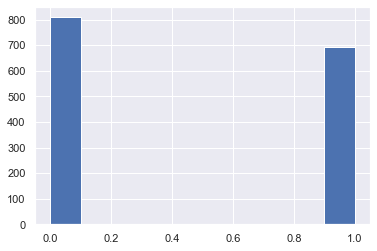

In [1757]:
data["Class"].hist()          

<function matplotlib.pyplot.show(close=None, block=None)>

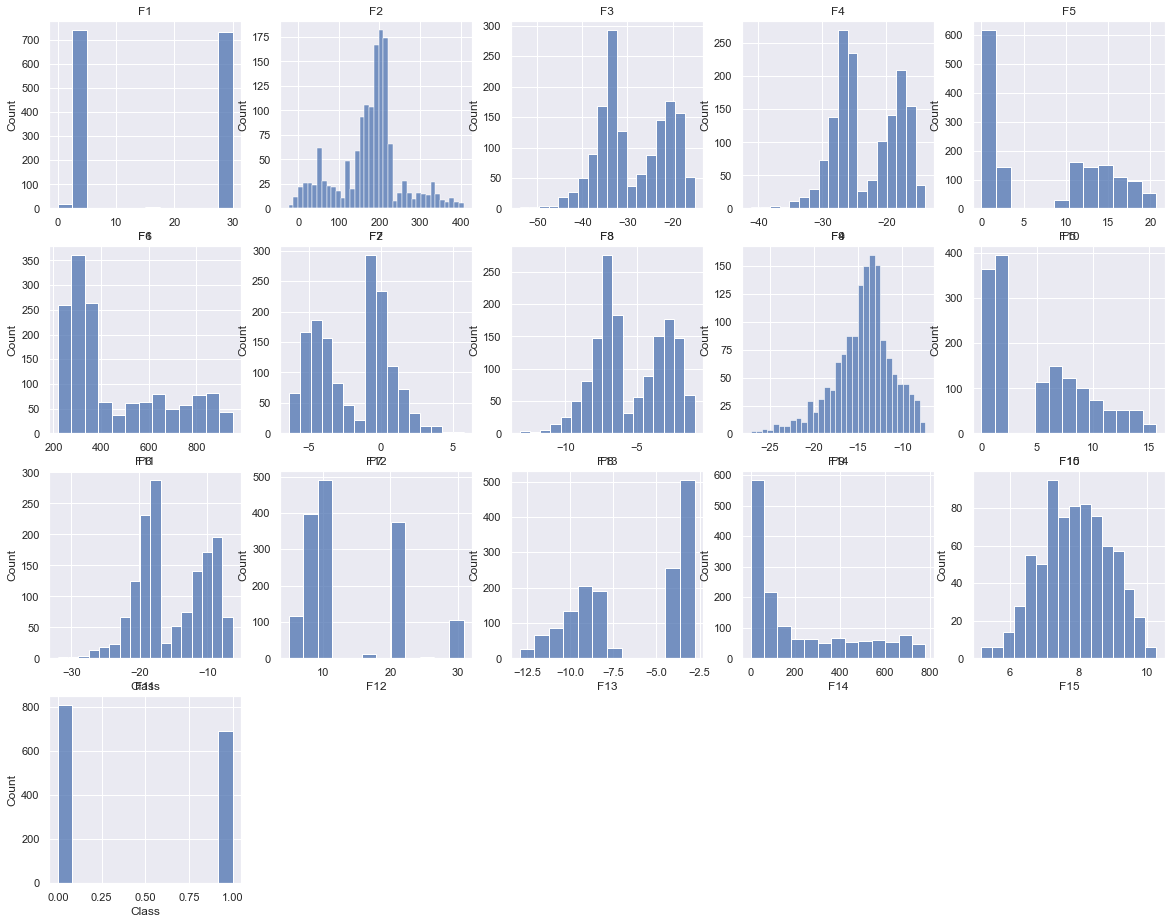

In [1758]:
plt.figure(figsize=(20,20))

for i, column in enumerate(data.columns):
  plt.subplot(5,5,i+1)
  sns.histplot(data=data[column])
  plt.title(column)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

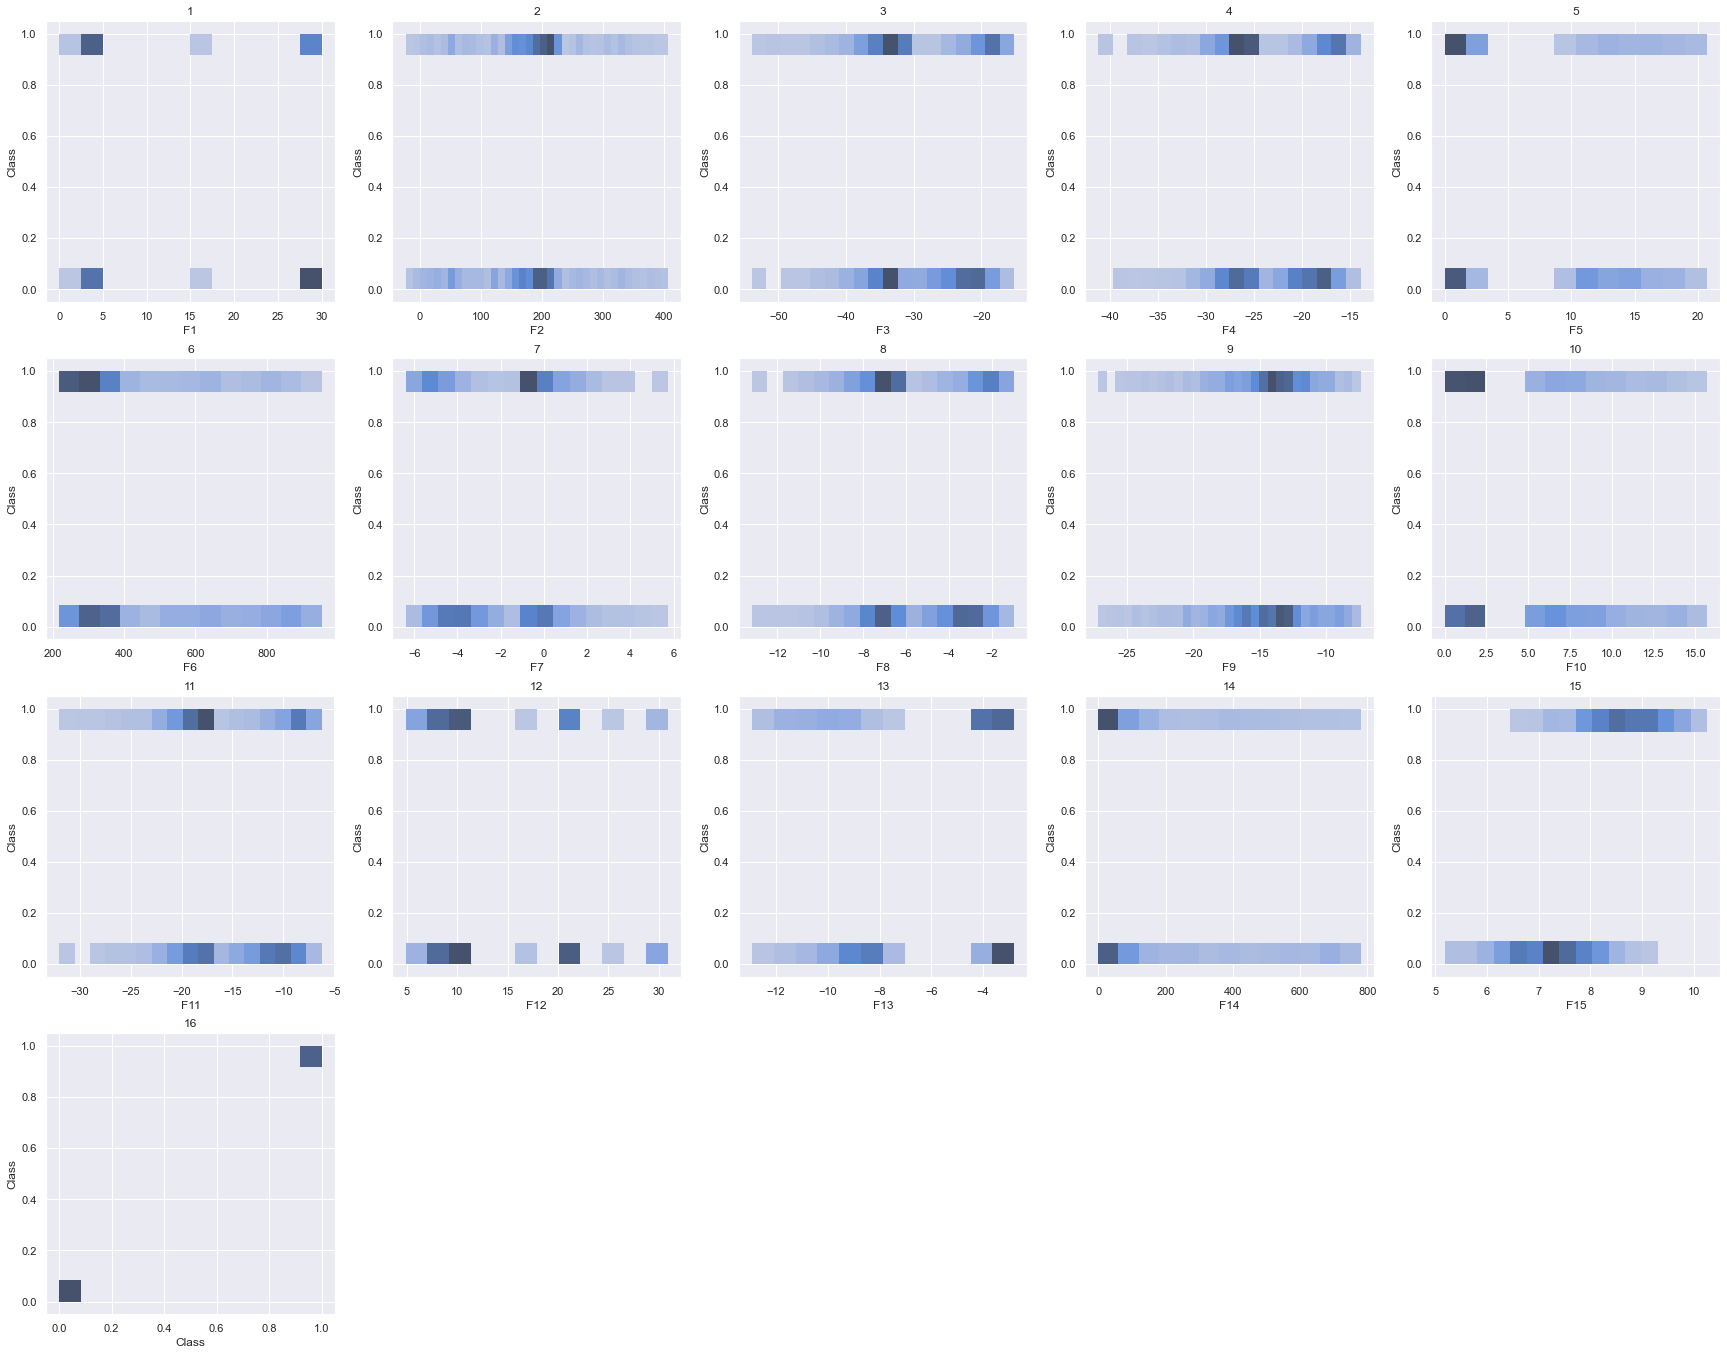

In [1759]:
plt.figure(figsize=(30,30))

for i, column in enumerate(data.columns):
  plt.subplot(5,5,i+1)
  sns.histplot(x = data[column],y= data['Class'])
  plt.title(i+1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

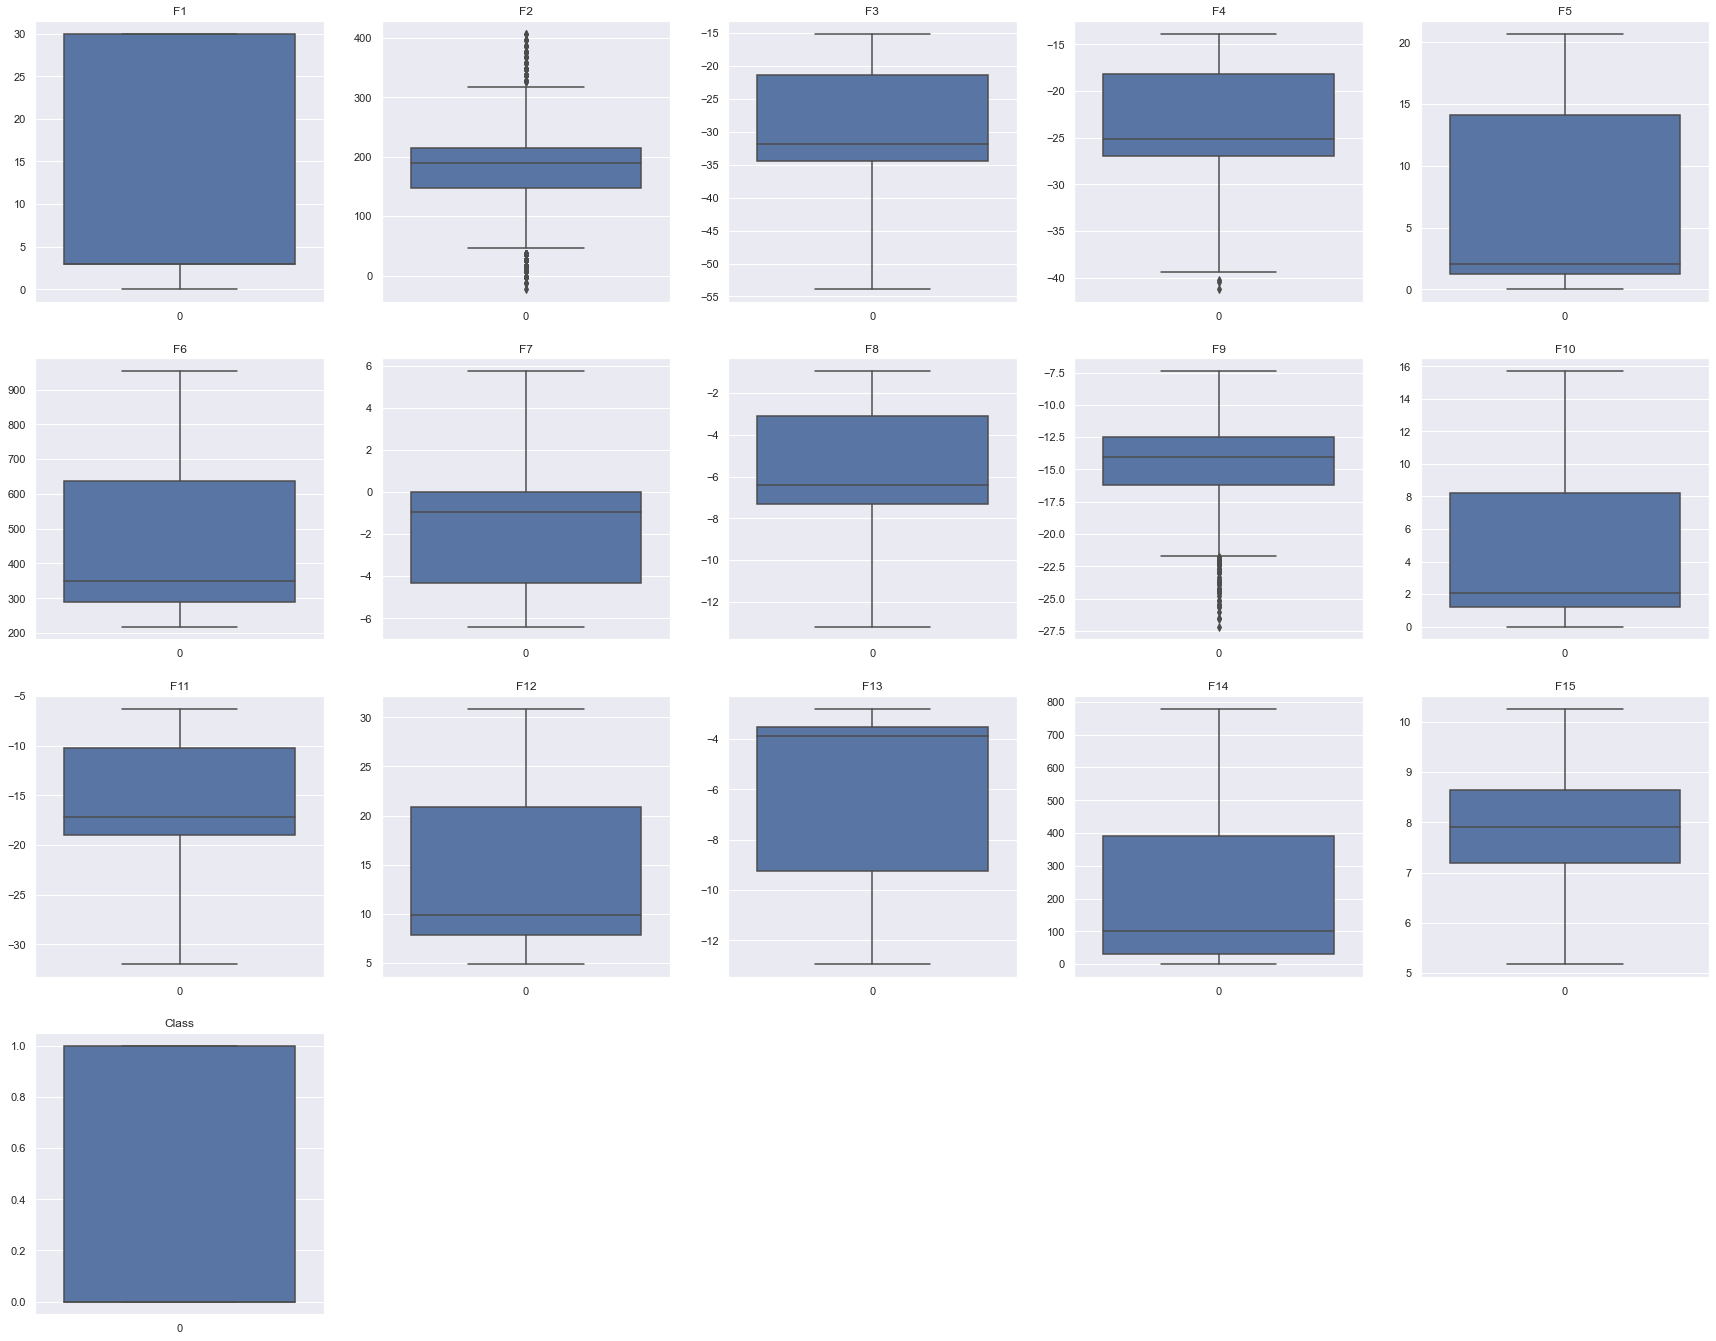

In [1178]:
plt.figure(figsize=(30,30))

for i, column in enumerate(data.columns):
  plt.subplot(5,5,i+1)
  sns.boxplot(data=data[column])
  plt.title(column)
plt.show

<AxesSubplot:>

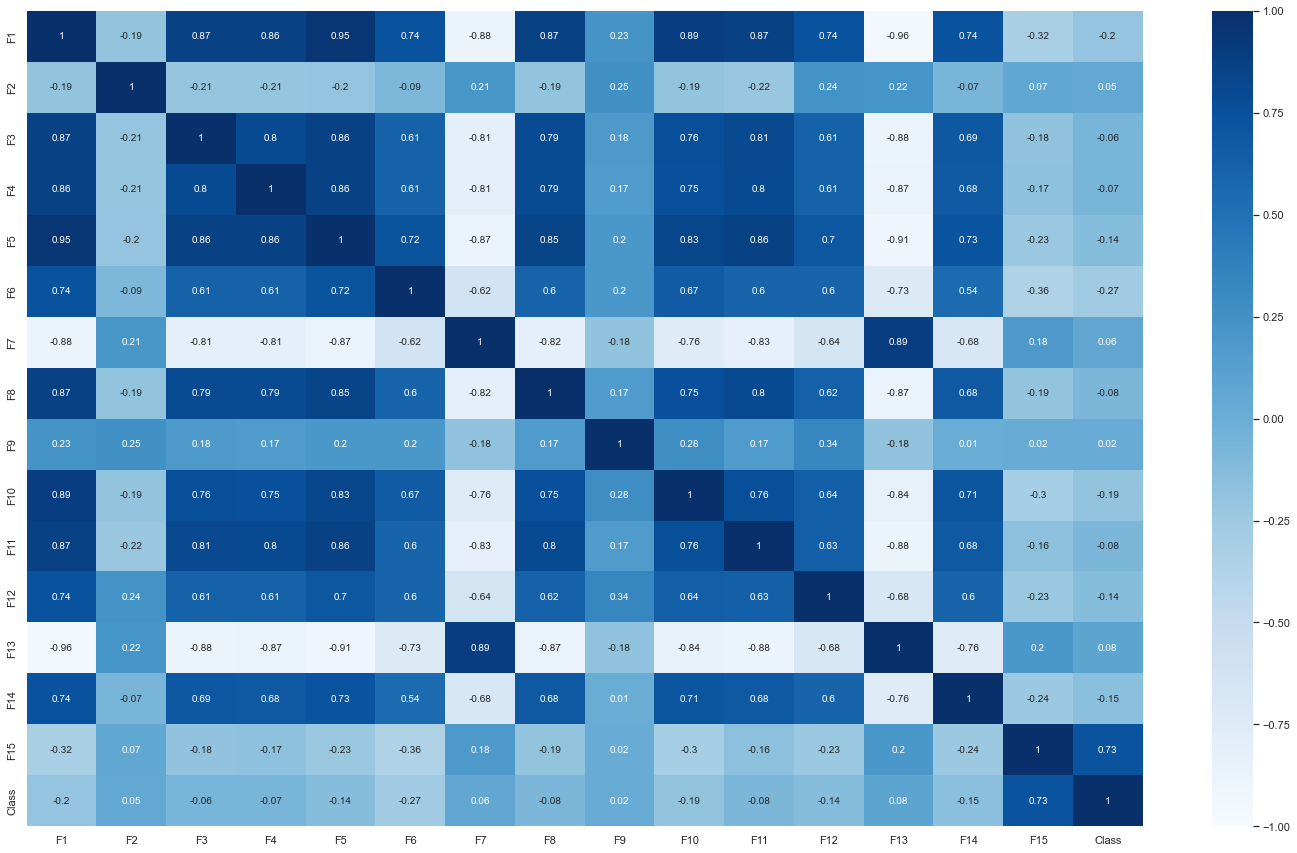

In [1179]:
plt.figure(figsize=(25,15))
sns.heatmap(round(data.corr(),2),annot=True, vmin = -1.0, cmap= "Blues")

# Data Cleansing

In [1760]:
#correlation of each variable with label
abs(data.corr())['Class'] 

F1       0.203649
F2       0.050738
F3       0.057144
F4       0.068795
F5       0.135190
F6       0.266599
F7       0.058308
F8       0.079035
F9       0.024064
F10      0.191255
F11      0.079108
F12      0.144057
F13      0.080522
F14      0.152249
F15      0.729540
Class    1.000000
Name: Class, dtype: float64

In [1761]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   int64  
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   int64  
 14  F15     750 non-null    float64
 15  Class   1500 non-null   int64  
dtypes: float64(13), int64(3)
memory usage: 187.6 KB
None


In [1762]:
#checking for null values
data.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

<AxesSubplot:>

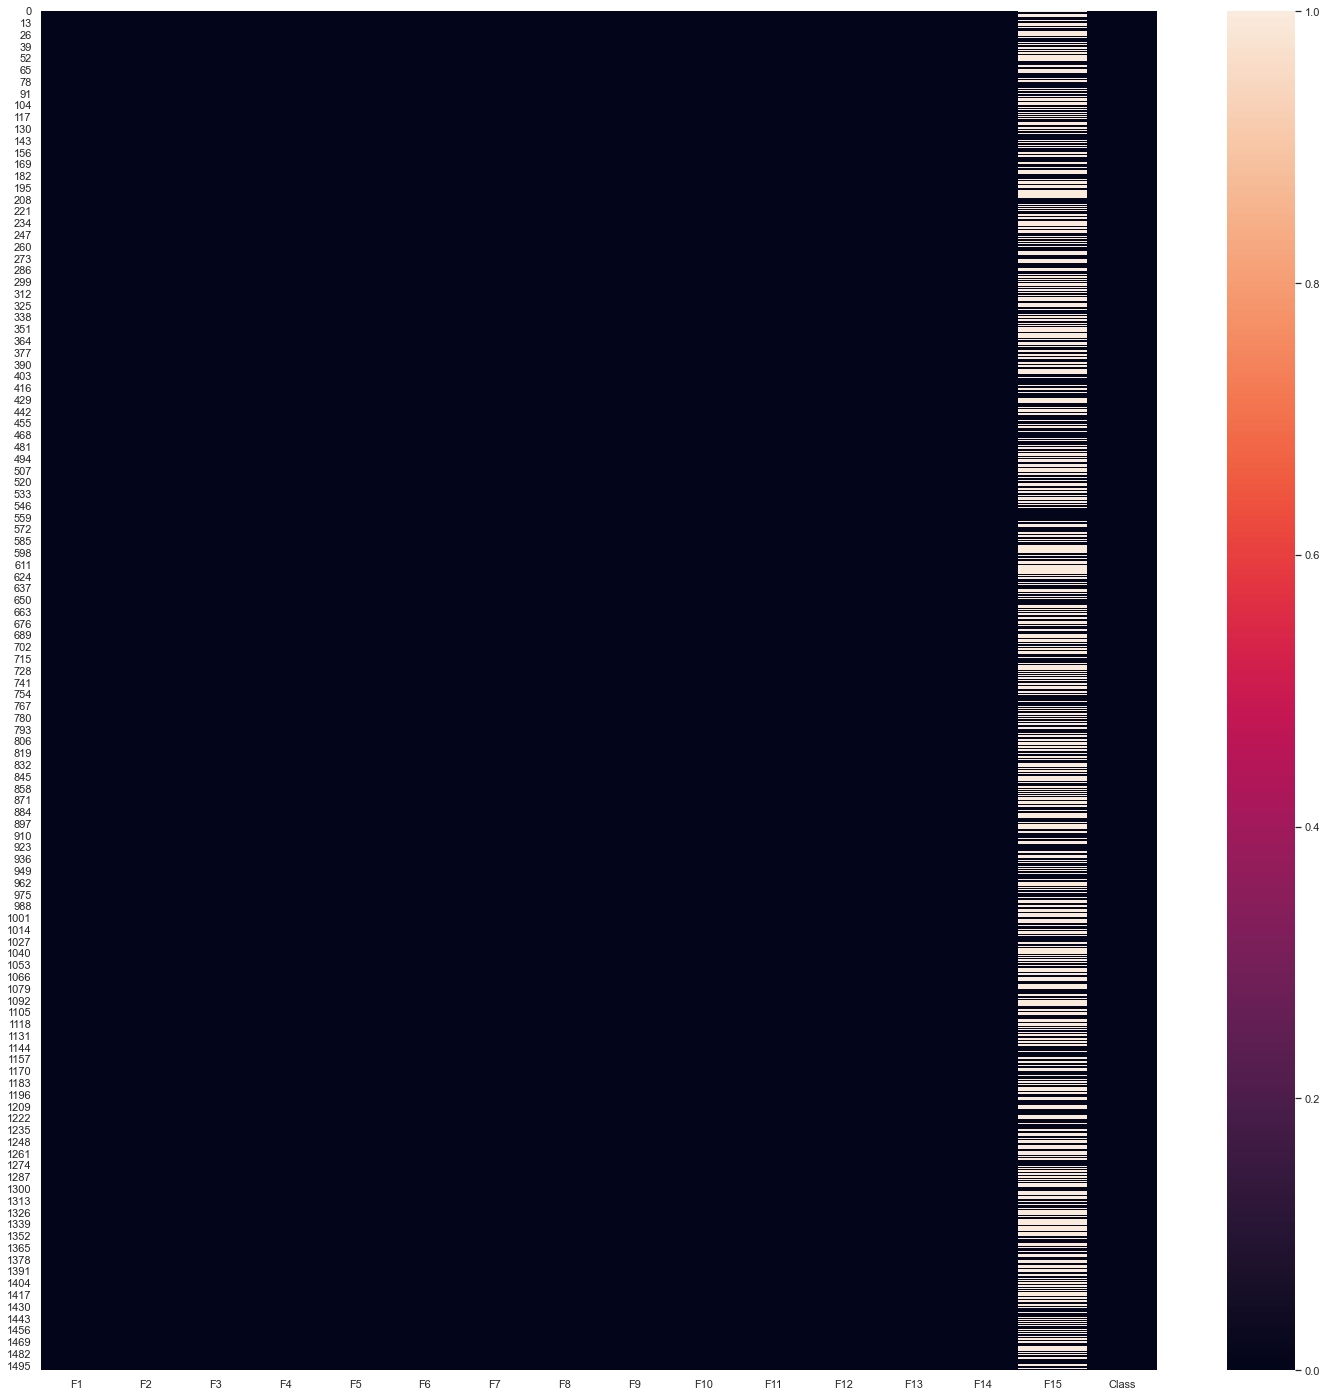

In [1763]:
#Heatmap for all the missing values in the data
plt.figure(figsize=(25,25))
sns.heatmap(data.isnull())

In [1764]:
#Finding the percentage of the missing data.
data['F15'].isnull().sum()/data.shape[0] * 100

50.0

<AxesSubplot:xlabel='F15', ylabel='Density'>

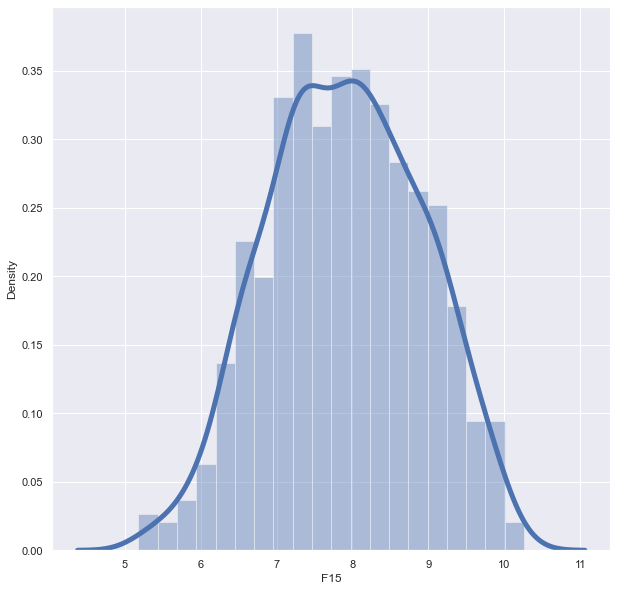

In [1765]:
#Distribution of the missing value feature
plt.figure(figsize=(10,10))
# sns.set()
sns.distplot(data['F15'],bins=20,kde_kws={'linewidth':5})

In [1766]:
#Filling the nan values with mean and median
data_mean = data.fillna(data.mean())
data_median = data.fillna(data.median())


<AxesSubplot:xlabel='F15', ylabel='Density'>

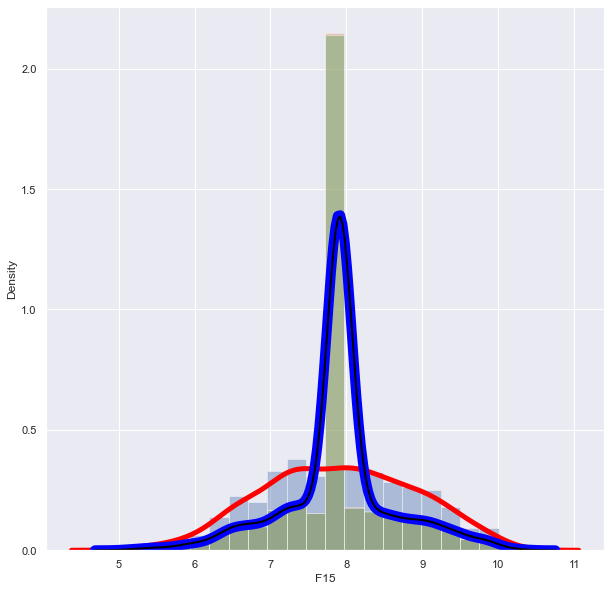

In [1902]:
#Plotting a graph for old and filled values
plt.figure(figsize=(10,10))
sns.set()
sns.distplot(data['F15'],bins=20,kde_kws={'linewidth':5, 'color':'red', 'label'})
sns.distplot(data_mean['F15'],bins=20,kde_kws={'linewidth':10, 'color':'blue'})
sns.distplot(data_median['F15'],bins=20,kde_kws={'linewidth':2, 'color':'black'})


In [1768]:
columns = data.columns

In [1769]:
#checking the unique values of all the features
for i in data.columns:
    print(i,data[i].nunique())


F1 4
F2 80
F3 650
F4 646
F5 216
F6 91
F7 656
F8 649
F9 432
F10 400
F11 660
F12 11
F13 214
F14 141
F15 331
Class 2


In [1771]:
data[['F10','F14','F15']][data[['F10','F14','F15']].isnull().any(axis=1)]

,F10,F14,F15
0,9.20,510,NaN
3,0.09,32,NaN
4,1.91,36,NaN
5,14.50,330,NaN
8,0.99,66,NaN
...,...,...,...
1487,13.40,630,NaN
1493,1.23,2,NaN
1494,7.40,490,NaN
1497,9.40,370,NaN


<AxesSubplot:xlabel='F15', ylabel='Density'>

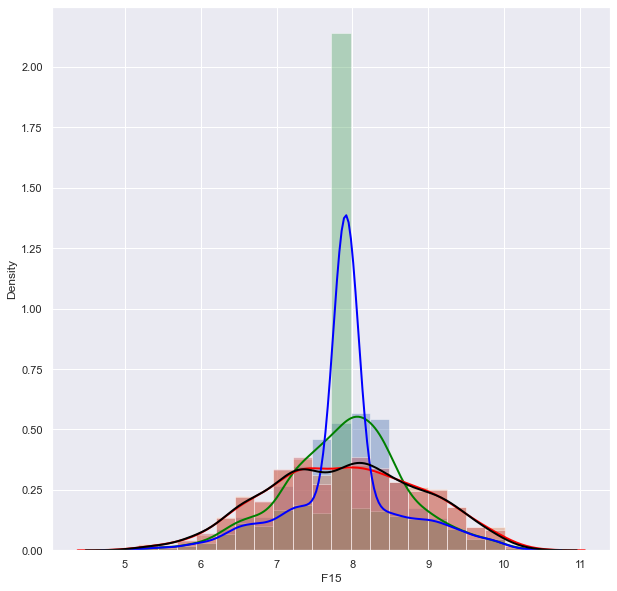

In [1903]:
#filling nan values with the comparision of other features which are important. 
df1 = data.copy()
for var_class in data['F6'].unique():
    df1.update(df1[df1.loc[:,'F6'] == var_class]['F15'].replace(np.nan,df1[df1.loc[:,'F6'] == var_class]['F15'].mean()))
df1


plt.figure(figsize=(10,10))
sns.set()
sns.distplot(df1['F15'],bins=20,kde_kws={'linewidth':2, 'color':'green'})
sns.distplot(data['F15'],bins=20,kde_kws={'linewidth':2, 'color':'red'})

#Using simpleimputer for filling the nan values
imp = ['median']
for i in imp:
    simputer = SimpleImputer(missing_values=np.nan, strategy=i)
    simputer = simputer.fit(data)
    simputer = pd.DataFrame(simputer.transform(data),columns=columns)
    sns.distplot(simputer['F15'],bins=20,kde_kws={'linewidth':2, 'color':'blue'})

    #Using knnimputer for filling the nan values
knnimputer = KNNImputer(missing_values=np.nan , n_neighbors=1)
knnimputer = knnimputer.fit(data)
knnimputer = pd.DataFrame(knnimputer.transform(data),columns=columns)
sns.distplot(knnimputer['F15'],bins=20,kde_kws={'linewidth':2, 'color':'Black'})



OBSERVATION : After replacing the Nan values with mean or median we are getting the same normally distributed gausian curve; however, the pean is too high due to high number in missing values so we will try to replace the NAN values on catagorical basis.

In [1790]:
   #Removing the outliers
OutlierFactor = LocalOutlierFactor()
out = OutlierFactor.fit_predict(data_mean)
data_mean['outliers'] = out.tolist()
data_mean = data_mean[data_mean['outliers'] == 1].reset_index(drop=True).drop(['outliers'], axis=1)
data_mean

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,7.903013,0
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,7.220000,0
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,7.690000,0
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,7.903013,0
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,7.903013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,30,156.88,-20.82,-16.82,16.70,398.22,-5.46,-3.46,-12.60,7.40,-7.32,20.89,-11.14,490,7.903013,1
1472,30,206.88,-22.35,-18.00,12.30,428.22,-3.27,-3.48,-8.46,9.20,-11.56,30.89,-8.44,260,6.520000,0
1473,30,106.88,-17.91,-17.48,13.50,623.22,-5.96,-2.59,-13.89,9.40,-7.06,20.89,-11.79,370,7.903013,1
1474,30,336.88,-23.73,-18.68,17.60,503.22,-5.01,-3.72,-7.98,6.50,-8.60,30.89,-8.04,250,7.903013,0


In [1803]:
    #Train-Test Split
X =simputer.drop(columns='Class',axis=1)    




y=simputer['Class']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42, stratify=y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [1804]:
print("X Train Shape:", X_train.shape)                                          # Checking the shape of the splitted data
print("Y Train Shape:", y_train.shape)
print("X Test Shape:", X_test.shape ) 
print("y Test Shape:", y_test.shape)

X Train Shape: (1200, 15)
Y Train Shape: (1200,)
X Test Shape: (300, 15)
y Test Shape: (300,)


# Training Multiple Models

In [1805]:
#Passing models in a for loop to check their accuracies
models = {
    "     Logistic Regression" : LogisticRegression(),
    "     K-Nearest Neighbour" : KNeighborsClassifier(),
    "  Support Vector Machine" : SVC(),
    "                 XGBOOST" : XGBClassifier(),
    "Decision Tree CLassfiier" : DecisionTreeClassifier(),
    "           Random Forest" : RandomForestClassifier(),
    "                     ANN" : MLPClassifier()
 }


print("Training accuracy :")
for name, model in models.items():
    model.fit(X_train,y_train)
    print(name + ": {:.2f}%".format(model.score(X_train,y_train) * 100))


print("Test Accuracy")
for name, model in models.items():
    model.predict(X_test)
    print(name + ": {:.2f}%".format(model.score(X_test,y_test) * 100, "\n\n"))

Training accuracy :
     Logistic Regression: 84.08%
     K-Nearest Neighbour: 84.50%
  Support Vector Machine: 84.92%
                 XGBOOST: 100.00%
Decision Tree CLassfiier: 100.00%
           Random Forest: 100.00%
                     ANN: 89.67%
Test Accuracy
     Logistic Regression: 85.00%
     K-Nearest Neighbour: 71.67%
  Support Vector Machine: 78.67%
                 XGBOOST: 87.67%
Decision Tree CLassfiier: 79.67%
           Random Forest: 84.33%
                     ANN: 86.67%


# Feature Selection

In [1806]:
#selecting the most important variables with minimum error

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(XGBClassifier(), k_features=15,forward=True,scoring='neg_mean_squared_error',cv=5)

sfs1.fit(X,y)
sfs1.subsets_



#  'F14'
# 'F3', , 'F9'
# 'F3', 'F9', 'F14',
# 'F1', 'F3', 'F14',
# 'F1',
# 'F1', 'F9'



#  'F5', 'F6', 'F13', 'F15' 9,1 

{1: {'feature_idx': (12,),
  'cv_scores': array([-0.33      , -0.32      , -0.30333333, -0.25666667, -0.34333333]),
  'avg_score': -0.31066666666666665,
  'feature_names': ('F13',)},
 2: {'feature_idx': (12, 14),
  'cv_scores': array([-0.24      , -0.23333333, -0.20333333, -0.22      , -0.25      ]),
  'avg_score': -0.2293333333333333,
  'feature_names': ('F13', 'F15')},
 3: {'feature_idx': (4, 12, 14),
  'cv_scores': array([-0.18      , -0.18      , -0.18333333, -0.22666667, -0.19333333]),
  'avg_score': -0.19266666666666668,
  'feature_names': ('F5', 'F13', 'F15')},
 4: {'feature_idx': (4, 5, 12, 14),
  'cv_scores': array([-0.17333333, -0.16666667, -0.18666667, -0.18      , -0.20333333]),
  'avg_score': -0.182,
  'feature_names': ('F5', 'F6', 'F13', 'F15')},
 5: {'feature_idx': (4, 5, 8, 12, 14),
  'cv_scores': array([-0.14      , -0.13666667, -0.16333333, -0.17333333, -0.14      ]),
  'avg_score': -0.15066666666666667,
  'feature_names': ('F5', 'F6', 'F9', 'F13', 'F15')},
 6: {'feat

In [1807]:
#Defining a baseline model for further feature selection

baseline_model = DecisionTreeClassifier()
baseline_model.fit(X_train,y_train)
print("Training: ", baseline_model.score(X_train,y_train))

y_pred_train_blm = baseline_model.predict(X_test)
print("\nTesting:\n", baseline_model.score(X_test,y_test) )


Training:  1.0

Testing:
 0.7833333333333333


Text(0.5, 1.0, 'Feature Importance')

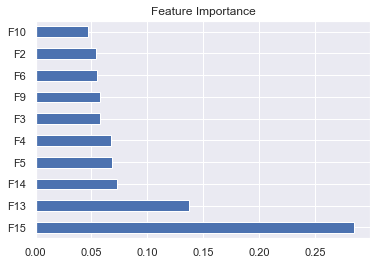

In [1298]:
#Plotting the graph of all the important features
plt = pd.Series(baseline_model.feature_importances_,index=X.columns).nlargest(10).plot(kind='barh')
plt.set_title('Feature Importance')



[Text(514.8408187794349, 526.6125000000001, 'X[14] <= 0.555\ngini = 0.497\nsamples = 1200\nvalue = [647, 553]'),
 Text(251.8514275902669, 492.63750000000005, 'X[14] <= -0.499\ngini = 0.436\nsamples = 850\nvalue = [577, 273]'),
 Text(48.411646389324964, 458.6625, 'X[12] <= -1.436\ngini = 0.252\nsamples = 365\nvalue = [311, 54]'),
 Text(26.279434850863424, 424.6875, 'X[13] <= 1.68\ngini = 0.469\nsamples = 32\nvalue = [12, 20]'),
 Text(15.767660910518053, 390.7125, 'X[6] <= -0.46\ngini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(10.51177394034537, 356.7375, 'X[5] <= 2.019\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(5.255886970172685, 322.76250000000005, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(15.767660910518053, 322.76250000000005, 'X[7] <= 0.991\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(10.51177394034537, 288.7875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(21.02354788069074, 288.7875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(21.0235478

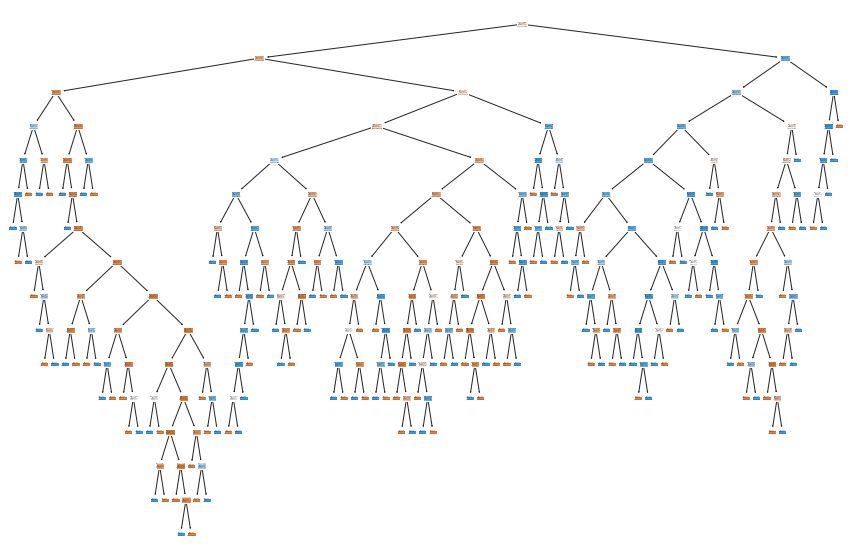

In [1490]:
#plotting the overfitted decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(baseline_model,filled=True)

No handles with labels found to put in legend.


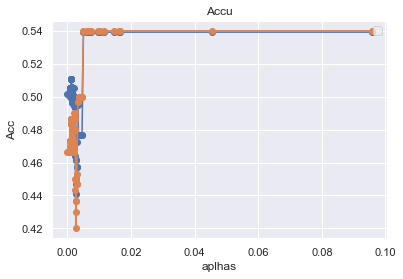

In [1720]:
#checking the best parameters for decision tree with cc_alpha

In [1808]:
simputer

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,30.0,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510.0,7.91,0.0
1,30.0,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760.0,7.22,0.0
2,30.0,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610.0,7.69,0.0
3,3.0,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32.0,7.91,0.0
4,3.0,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36.0,7.91,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,30.0,266.88,-18.69,-17.30,14.70,383.22,-4.94,-3.05,-9.78,5.95,-14.20,20.89,-9.29,110.0,9.38,1.0
1496,30.0,206.88,-22.35,-18.00,12.30,428.22,-3.27,-3.48,-8.46,9.20,-11.56,30.89,-8.44,260.0,6.52,0.0
1497,30.0,106.88,-17.91,-17.48,13.50,623.22,-5.96,-2.59,-13.89,9.40,-7.06,20.89,-11.79,370.0,7.91,1.0
1498,30.0,336.88,-23.73,-18.68,17.60,503.22,-5.01,-3.72,-7.98,6.50,-8.60,30.89,-8.04,250.0,7.91,0.0


In [1904]:
new

,F15,F13,F5,F6,F9,Class
0,7.91,-8.54,14.20,563.22,-18.90,0.0
1,7.22,-8.44,19.70,353.22,-18.33,0.0
2,7.69,-8.79,17.30,398.22,-14.64,0.0
3,7.91,-3.78,0.84,344.22,-14.73,0.0
4,7.91,-3.25,1.52,278.22,-13.62,1.0
...,...,...,...,...,...,...
1495,9.38,-9.29,14.70,383.22,-9.78,1.0
1496,6.52,-8.44,12.30,428.22,-8.46,0.0
1497,7.91,-11.79,13.50,623.22,-13.89,1.0
1498,7.91,-8.04,17.60,503.22,-7.98,0.0


In [1810]:
#New Train/test split with limited important features
new = simputer.filter(['F15','F13', 'F5', 'F6', 'F9', 'Class'], axis=1)
new
X2 =new.drop(columns='Class',axis=1)                                       # Removing the target column from the date and assigning it to variable y
y2=new['Class']
scaler = StandardScaler()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, shuffle=True, random_state=42, stratify=y)
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.fit_transform(X2_test)

In [1812]:
# Applying RandomsearchCV for tuning the model
params={
            'criterion' : [ "gini", "entropy" ],
            'max_depth': np.arange(0,50),
            'min_samples_split' : np.arange(0,50),
            'min_samples_leaf' : np.arange(0,20),
            'max_leaf_nodes' : np.arange(0,50),

}

grid_search_dt = RandomizedSearchCV(estimator = DecisionTreeClassifier(),
                                       param_distributions=params,
                                       scoring="neg_mean_absolute_error",
                                       n_iter=20000,
                                       n_jobs=4,
                                       cv=5,
                                       return_train_score = True,
                                       verbose=3)
grid_search_dt.fit(X2_train,y2_train)
# print("Training score : ", accuracy_score(y2_train, grid_search_dt.predict(X2_train))
# print("Test score : ", accuracy_score(y2_test, grid_search_dt.predict(X2_test))

Fitting 5 folds for each of 20000 candidates, totalling 100000 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20000,
                   n_jobs=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_leaf_nodes': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,...
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),
                                        'min_samples_split': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29

In [1814]:
#printing out the accuracy of train and test data
accuracy_score(y2_train, grid_search_dt.predict(X2_train)),accuracy_score(y2_test, grid_search_dt.predict(X2_test))

(0.8666666666666667, 0.8)

[[132  30]
 [ 30 108]]
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       162
         1.0       0.78      0.78      0.78       138

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



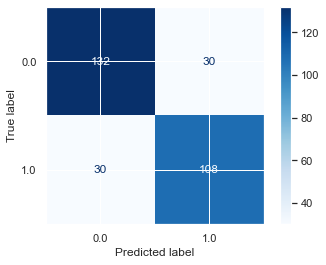

In [1815]:
#evaluating the performance of the model with the help of confusion matrix and classification report
y_pred_train_dt = grid_search_dt.predict(X2_test)
y_pred_test =grid_search_dt.predict(X2_test)
print(confusion_matrix(y2_test,y_pred_test))
plot_confusion_matrix(grid_search_dt, X2_test, y2_test,cmap="Blues")
print(classification_report(y2_test,y_pred_train_dt))

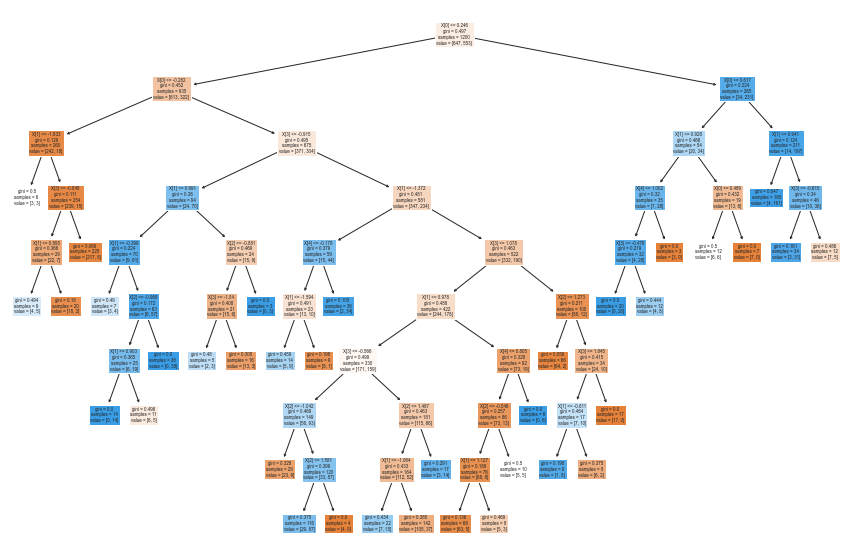

In [1914]:
#checking the performance with the help of plotting the tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(DecisionTreeClassifier(max_depth=9, max_leaf_nodes=36, min_samples_leaf=3,
                       min_samples_split=16).fit(X2_train,y2_train),filled=True)
plt.savefig('foo.png')

In [1817]:
#checking the best estimators from the results of randomsearchCV
grid_search_dt.best_estimator_

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=36, min_samples_leaf=3,
                       min_samples_split=16)

# XGBoost

In [1824]:
#RandomSearchCV
param_xgb={
    'max_depth'          : np.arange(2,20), 
    "learning_rate"      : [ 0.01, 0.1 , 0.15 , 0.20, 0.23, 0.25,0.28, 0.30], 
    "n_estimators"       : [100,115,120,125,130,140,150,160,170,180,190,200],
    "gamma"              : [ 0.0,0.01,0.05,0.1,0.15],
    "colsample_bytree"   : [ 0.2,0.3,0.4,0.45,0.5] 
    }
grid_search_xgb = RandomizedSearchCV(
                                   estimator = XGBClassifier(),
                                   param_distributions=param_xgb,
                                   scoring="neg_mean_absolute_error",
                                       n_iter=200,
                                       n_jobs=4,
                                       cv=5,
                                       return_train_score = True,
                                       verbose=3)

#Fitting the model for RandomCV
grid_search_xgb.fit(X2_train,y2_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                   param_distributions={'colsample_bytree': [0.2, 0.3, 0.4,
                                                             0

In [1825]:
accuracy_score(y2_train, grid_search_xgb.predict(X2_train)),accuracy_score(y2_test, grid_search_xgb.predict(X2_test))

(0.9258333333333333, 0.8733333333333333)

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88       162
         1.0       0.88      0.84      0.86       138

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



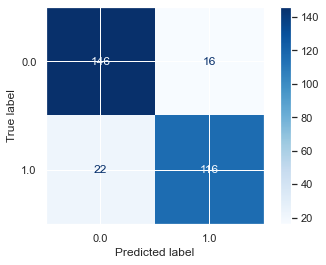

In [1826]:
y_pred_train_xgb = grid_search_xgb.predict(X2_test)
plot_confusion_matrix(grid_search_xgb, X2_test, y2_test,cmap="Blues")
print(classification_report(y_test, y_pred_train_xgb))

In [1877]:
grid_search_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.45,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

# RANDOM FOREST CLASSIFIER

In [1828]:
#Using GridSearchCV
params_rfc={
            'max_depth'               : [7,8,9,10], 
            'min_samples_leaf'        : [3,4,5,6,10], 
            'min_samples_split'       : [3,4,5,6], 
            'n_estimators'            : [150,200,250],
            'criterion'               : [ "gini", "entropy" ]
}

cv_rfc = GridSearchCV(
                                       estimator=RandomForestClassifier(), 
                                       param_grid=params_rfc,
                                       scoring="accuracy",
                                       n_jobs=4,
                                       cv=5,
                                       return_train_score = True,
                                       verbose=10

                                )
#Fitting the model for RandomCV
cv_rfc.fit(X2_train,y2_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [3, 4, 5, 6, 10],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [150, 200, 250]},
             return_train_score=True, scoring='accuracy', verbose=10)

In [1829]:
cv_rfc.best_params_

# {'criterion': 'entropy',
#  'max_depth': 17,
#  'min_samples_leaf': 2,
#  'min_samples_split': 3,
#  'n_estimators': 200}

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 150}

In [1831]:
model_rfc = RandomForestClassifier(
                                   criterion         = 'entropy',
                                   max_depth         = 10, 
                                   min_samples_leaf  = 3, 
                                   min_samples_split = 3,
                                   n_estimators      = 150)
m = model_rfc.fit(X2_train,y2_train)
score_rfc = cross_val_score(model_rfc,X2_train,y2_train,cv=10)
print("Training:\nAverage score for 10CV is : ", score_rfc.mean())

y_pred_train_rfc = model_rfc.predict(X2_test)
print("\nTesting:\nAccuracy score of test data is: ", model_rfc.score(X2_test,y2_test) )

Training:
Average score for 10CV is :  0.8550000000000001

Testing:
Accuracy score of test data is:  0.86


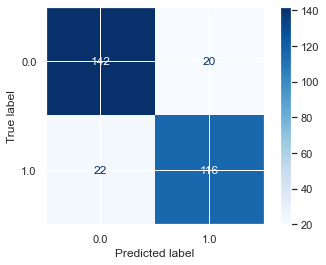

In [1832]:
y_pred_test_rfc =model_rfc.predict(X2_test)
plot_confusion_matrix(model_rfc, X2_test, y2_test,cmap="Blues")
plt.show()

In [1833]:
print(classification_report(y2_test,y_pred_test_rfc))

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       162
         1.0       0.85      0.84      0.85       138

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



# TEST DATA

In [1894]:
#Importing the test data and performing the Data CLeansing and Feature Engineering same as our test data
data_test = pd.read_csv("C:\\Users\\talib\\Artificial Intelligence\\Coursework\\CE802_P2_Data\\CE802_P2_test.csv")
dt = data_test.filter(['F15','F13', 'F5', 'F6', 'F9'], axis=1)
dt

,F15,F13,F5,F6,F9
0,NaN,-3.38,1.80,284.22,-20.55
1,8.81,-3.77,1.48,368.22,-12.63
2,NaN,-3.51,1.74,329.22,-18.33
3,NaN,-9.49,13.50,563.22,-13.56
4,7.28,-3.56,0.68,263.22,-22.26
...,...,...,...,...,...
1495,NaN,-8.29,10.60,758.22,-13.95
1496,7.77,-3.70,0.36,371.22,-16.05
1497,7.16,-8.39,10.50,683.22,-21.75
1498,NaN,-3.29,1.76,239.22,-12.57


In [1895]:
dt = dt.fillna(dt.median())
dt = scaler.fit_transform(dt)
dt


array([[-9.39232710e-04,  9.96831449e-01, -8.71446038e-01,
        -7.99906449e-01, -1.59604539e+00],
       [ 1.21959832e+00,  8.76361092e-01, -9.17996192e-01,
        -3.91994077e-01,  6.01760311e-01],
       [-9.39232710e-04,  9.56674663e-01, -8.80174192e-01,
        -5.81381964e-01, -9.79993793e-01],
       ...,
       [-1.08198678e+00, -5.50749283e-01,  3.94136275e-01,
         1.13767732e+00, -1.92904625e+00],
       [-9.39232710e-04,  1.02463230e+00, -8.77264807e-01,
        -1.01843093e+00,  6.18410354e-01],
       [-9.39232710e-04, -1.12221123e+00,  1.10693551e+00,
         8.46311337e-01,  6.10085333e-01]])

In [1896]:
#Predicting the labels with the help of trained model
y_final = grid_search_xgb.predict(dt)
data_test['Class'] = y_final.tolist()

In [1898]:
#Updating the predicted values
data_test.replace({'Class': {0: False, 1:True}}, inplace=True)
data_test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,0,196.88,-39.51,-24.76,1.80,284.22,-0.26,-9.05,-20.55,1.17,-22.02,7.89,-3.38,2,NaN,False
1,3,196.88,-31.74,-31.54,1.48,368.22,-0.90,-6.35,-12.63,1.64,-18.34,7.89,-3.77,10,8.81,True
2,3,160.88,-33.09,-25.76,1.74,329.22,1.45,-6.55,-18.33,1.30,-19.48,7.89,-3.51,98,NaN,True
3,30,206.88,-20.19,-24.48,13.50,563.22,-3.24,-2.30,-13.56,5.50,-8.58,30.89,-9.49,270,NaN,False
4,3,218.88,-33.51,-33.38,0.68,263.22,1.41,-6.80,-22.26,1.01,-22.90,7.89,-3.56,106,7.28,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,30,26.88,-29.04,-21.62,10.60,758.22,-2.31,-4.86,-13.95,6.80,-15.76,20.89,-8.29,120,NaN,False
1496,0,202.88,-37.32,-25.78,0.36,371.22,2.04,-9.52,-16.05,1.17,-26.78,7.89,-3.70,24,7.77,False
1497,30,16.88,-27.69,-23.38,10.50,683.22,-2.46,-3.86,-21.75,8.40,-12.52,10.89,-8.39,160,7.16,False
1498,0,174.88,-35.70,-25.64,1.76,239.22,-0.64,-7.08,-12.57,1.70,-17.44,7.89,-3.29,40,NaN,True


In [1900]:
#Extracting the file in CSV
export_file = data_test.to_csv('C:\\Users\\talib\\Artificial Intelligence\\Coursework\\CE802_P2_Data\\testP2.csv')
export_file